# Installation
Ensure you install depedencies in **requirements.txt**
Ex:
```
pip install -r requirements.txt
conda install --file requirements.txt
```
Note: Ensure you're in the repo's directory where the requirements.txt is

In [57]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from langdetect import detect
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

In [3]:
# Install NLTK packages if not already installed
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/wordnet')
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('punkt')
    nltk.download('wordnet')
    nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\19167\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\19167\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\19167\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Explore Text Data

In [62]:
def load_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

In [63]:
# Load data
data_url = "./raw_datasets/SUAS-Competition-FALL2023-Final-Report.txt"
raw_text_data = load_data(data_url)

In [64]:
print(raw_text_data)

﻿SUAS Competition - Software Team
FALL 2023 Final Report
Authors:        Marc Cruz, Abdul Kalam Syed, Max Gross, Joshua Estrada, Jason Mar, Josh Ng, 
Ethan Tarrer, Sarkis Gafayan, Rubayet Mujahid, David Jackson
Status:                Done
Date:                Sep 21, 2023


Relative Links:
SUAS Competition - Software Team Overview
SUAS Competition - Technical Design Document
SUAS Competition - Machine Learning Models


1. Introduction        2
2. FALL 2023 Progress        3
2.1 Timeline        3
2.2 Recruitment (August - September)        4
2.3 Learning Phase (August - October)        4
2.3.1 ODLC        4
2.3.2 Obstacle Avoidance        5
2.4 ODLC Design        5
2.5 Hardware Trade Studies        7
2.5.1 ODLC Trade Studies        7
2.5.1.1 OBC Trade Study        7
2.5.1.1 Camera Trade Study        8
2.5.2 Obstacle Avoidance Trade Study        9
2.6 Data Collection and Dataset Phase (October - December)        10
2.6.1 Standardized Object shape ML model        10
2.6.2 Standardized Obj

# Text Cleanup

In [65]:
raw_text_sentences = raw_text_data.split('. ')

In [66]:
print(raw_text_sentences)

['\ufeffSUAS Competition - Software Team\nFALL 2023 Final Report\nAuthors:        Marc Cruz, Abdul Kalam Syed, Max Gross, Joshua Estrada, Jason Mar, Josh Ng, \nEthan Tarrer, Sarkis Gafayan, Rubayet Mujahid, David Jackson\nStatus:                Done\nDate:                Sep 21, 2023\n\n\nRelative Links:\nSUAS Competition - Software Team Overview\nSUAS Competition - Technical Design Document\nSUAS Competition - Machine Learning Models\n\n\n1', 'Introduction        2\n2', 'FALL 2023 Progress        3\n2.1 Timeline        3\n2.2 Recruitment (August - September)        4\n2.3 Learning Phase (August - October)        4\n2.3.1 ODLC        4\n2.3.2 Obstacle Avoidance        5\n2.4 ODLC Design        5\n2.5 Hardware Trade Studies        7\n2.5.1 ODLC Trade Studies        7\n2.5.1.1 OBC Trade Study        7\n2.5.1.1 Camera Trade Study        8\n2.5.2 Obstacle Avoidance Trade Study        9\n2.6 Data Collection and Dataset Phase (October - December)        10\n2.6.1 Standardized Object shape ML

In [7]:
def remove_text_punctuation(text):
    # Remove punctuation
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    return cleaned_text

def lowercase_text(text):
    # Convert to lowercase
    cleaned_text = text.lower()
    return cleaned_text

def remove_text_leading_trailing_whitespaces(text):
    # Remove extra whitespaces
    cleaned_text = re.sub('\s+', ' ', text).strip()
    return cleaned_text

def remove_non_english(text):
    sentences = sent_tokenize(text)
    cleaned_sentences = []
    for sentence in sentences:
        try:
            if detect(sentence) == 'en':
                cleaned_sentences.append(sentence)
        except:
            pass
    return ' '.join(cleaned_sentences)

In [8]:
no_punctuation_text_data = remove_text_punctuation(raw_text_data)
print(no_punctuation_text_data)

SUAS Competition  Software Team
FALL 2023 Final Report
Authors        Marc Cruz Abdul Kalam Syed Max Gross Joshua Estrada Jason Mar Josh Ng 
Ethan Tarrer Sarkis Gafayan Rubayet Mujahid David Jackson
Status                Done
Date                Sep 21 2023


Relative Links
SUAS Competition  Software Team Overview
SUAS Competition  Technical Design Document
SUAS Competition  Machine Learning Models


1 Introduction        2
2 FALL 2023 Progress        3
21 Timeline        3
22 Recruitment August  September        4
23 Learning Phase August  October        4
231 ODLC        4
232 Obstacle Avoidance        5
24 ODLC Design        5
25 Hardware Trade Studies        7
251 ODLC Trade Studies        7
2511 OBC Trade Study        7
2511 Camera Trade Study        8
252 Obstacle Avoidance Trade Study        9
26 Data Collection and Dataset Phase October  December        10
261 Standardized Object shape ML model        10
262 Standardized Object Shape  Alphanumeric Color ML model        12
263 S

In [9]:
lowercased_text_data = lowercase_text(no_punctuation_text_data)
print(lowercased_text_data)

suas competition  software team
fall 2023 final report
authors        marc cruz abdul kalam syed max gross joshua estrada jason mar josh ng 
ethan tarrer sarkis gafayan rubayet mujahid david jackson
status                done
date                sep 21 2023


relative links
suas competition  software team overview
suas competition  technical design document
suas competition  machine learning models


1 introduction        2
2 fall 2023 progress        3
21 timeline        3
22 recruitment august  september        4
23 learning phase august  october        4
231 odlc        4
232 obstacle avoidance        5
24 odlc design        5
25 hardware trade studies        7
251 odlc trade studies        7
2511 obc trade study        7
2511 camera trade study        8
252 obstacle avoidance trade study        9
26 data collection and dataset phase october  december        10
261 standardized object shape ml model        10
262 standardized object shape  alphanumeric color ml model        12
263 s

In [10]:
no_whitespaces_text_data = remove_text_leading_trailing_whitespaces(lowercased_text_data)
print(no_whitespaces_text_data)

suas competition software team fall 2023 final report authors marc cruz abdul kalam syed max gross joshua estrada jason mar josh ng ethan tarrer sarkis gafayan rubayet mujahid david jackson status done date sep 21 2023 relative links suas competition software team overview suas competition technical design document suas competition machine learning models 1 introduction 2 2 fall 2023 progress 3 21 timeline 3 22 recruitment august september 4 23 learning phase august october 4 231 odlc 4 232 obstacle avoidance 5 24 odlc design 5 25 hardware trade studies 7 251 odlc trade studies 7 2511 obc trade study 7 2511 camera trade study 8 252 obstacle avoidance trade study 9 26 data collection and dataset phase october december 10 261 standardized object shape ml model 10 262 standardized object shape alphanumeric color ml model 12 263 standardized object alphanumeric ml model 13 27 modeling phase october february 13 271 uav image recognition trade study decision matrix 13 2711 training yolo mode

In [11]:
english_only_text_data = remove_non_english(no_whitespaces_text_data)
# cleaned_dataset is the dataset that has been fully cleaned
cleaned_text_data = english_only_text_data
print(cleaned_text_data)

suas competition software team fall 2023 final report authors marc cruz abdul kalam syed max gross joshua estrada jason mar josh ng ethan tarrer sarkis gafayan rubayet mujahid david jackson status done date sep 21 2023 relative links suas competition software team overview suas competition technical design document suas competition machine learning models 1 introduction 2 2 fall 2023 progress 3 21 timeline 3 22 recruitment august september 4 23 learning phase august october 4 231 odlc 4 232 obstacle avoidance 5 24 odlc design 5 25 hardware trade studies 7 251 odlc trade studies 7 2511 obc trade study 7 2511 camera trade study 8 252 obstacle avoidance trade study 9 26 data collection and dataset phase october december 10 261 standardized object shape ml model 10 262 standardized object shape alphanumeric color ml model 12 263 standardized object alphanumeric ml model 13 27 modeling phase october february 13 271 uav image recognition trade study decision matrix 13 2711 training yolo mode

# Saving Cleaned Text Data

In [12]:
def save_cleaned_text(cleaned_text, file_path):
    with open(file_path, 'w', encoding='utf-8') as file:
        file.write(cleaned_text)

In [13]:
file_path = 'cleaned_datasets/cleaned_SUAS_final_report.txt'
save_cleaned_text(cleaned_text_data, file_path)

# Preprocessing

In [14]:
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized_tokens

## Tokenization

In [15]:
tokens = tokenize_text(cleaned_text_data)

In [16]:
print(tokens)

['suas', 'competition', 'software', 'team', 'fall', '2023', 'final', 'report', 'authors', 'marc', 'cruz', 'abdul', 'kalam', 'syed', 'max', 'gross', 'joshua', 'estrada', 'jason', 'mar', 'josh', 'ng', 'ethan', 'tarrer', 'sarkis', 'gafayan', 'rubayet', 'mujahid', 'david', 'jackson', 'status', 'done', 'date', 'sep', '21', '2023', 'relative', 'links', 'suas', 'competition', 'software', 'team', 'overview', 'suas', 'competition', 'technical', 'design', 'document', 'suas', 'competition', 'machine', 'learning', 'models', '1', 'introduction', '2', '2', 'fall', '2023', 'progress', '3', '21', 'timeline', '3', '22', 'recruitment', 'august', 'september', '4', '23', 'learning', 'phase', 'august', 'october', '4', '231', 'odlc', '4', '232', 'obstacle', 'avoidance', '5', '24', 'odlc', 'design', '5', '25', 'hardware', 'trade', 'studies', '7', '251', 'odlc', 'trade', 'studies', '7', '2511', 'obc', 'trade', 'study', '7', '2511', 'camera', 'trade', 'study', '8', '252', 'obstacle', 'avoidance', 'trade', 'stu

## Stopwords

In [17]:
filtered_tokens = remove_stopwords(tokens)

In [18]:
print(filtered_tokens)

['suas', 'competition', 'software', 'team', 'fall', '2023', 'final', 'report', 'authors', 'marc', 'cruz', 'abdul', 'kalam', 'syed', 'max', 'gross', 'joshua', 'estrada', 'jason', 'mar', 'josh', 'ng', 'ethan', 'tarrer', 'sarkis', 'gafayan', 'rubayet', 'mujahid', 'david', 'jackson', 'status', 'done', 'date', 'sep', '21', '2023', 'relative', 'links', 'suas', 'competition', 'software', 'team', 'overview', 'suas', 'competition', 'technical', 'design', 'document', 'suas', 'competition', 'machine', 'learning', 'models', '1', 'introduction', '2', '2', 'fall', '2023', 'progress', '3', '21', 'timeline', '3', '22', 'recruitment', 'august', 'september', '4', '23', 'learning', 'phase', 'august', 'october', '4', '231', 'odlc', '4', '232', 'obstacle', 'avoidance', '5', '24', 'odlc', 'design', '5', '25', 'hardware', 'trade', 'studies', '7', '251', 'odlc', 'trade', 'studies', '7', '2511', 'obc', 'trade', 'study', '7', '2511', 'camera', 'trade', 'study', '8', '252', 'obstacle', 'avoidance', 'trade', 'stu

## Lemmatization

In [19]:
lemmatized_tokens = lemmatize_tokens(filtered_tokens)

In [20]:
print(lemmatized_tokens)

['suas', 'competition', 'software', 'team', 'fall', '2023', 'final', 'report', 'author', 'marc', 'cruz', 'abdul', 'kalam', 'syed', 'max', 'gross', 'joshua', 'estrada', 'jason', 'mar', 'josh', 'ng', 'ethan', 'tarrer', 'sarkis', 'gafayan', 'rubayet', 'mujahid', 'david', 'jackson', 'status', 'done', 'date', 'sep', '21', '2023', 'relative', 'link', 'suas', 'competition', 'software', 'team', 'overview', 'suas', 'competition', 'technical', 'design', 'document', 'suas', 'competition', 'machine', 'learning', 'model', '1', 'introduction', '2', '2', 'fall', '2023', 'progress', '3', '21', 'timeline', '3', '22', 'recruitment', 'august', 'september', '4', '23', 'learning', 'phase', 'august', 'october', '4', '231', 'odlc', '4', '232', 'obstacle', 'avoidance', '5', '24', 'odlc', 'design', '5', '25', 'hardware', 'trade', 'study', '7', '251', 'odlc', 'trade', 'study', '7', '2511', 'obc', 'trade', 'study', '7', '2511', 'camera', 'trade', 'study', '8', '252', 'obstacle', 'avoidance', 'trade', 'study', '9

# n-grams

In [58]:
def generate_ngrams(tokens, n):
    n_grams = ngrams(tokens, n)
    return [' '.join(gram) for gram in n_grams]

In [59]:
bi_grams = generate_ngrams(lemmatized_tokens, 2)
print("Bi-grams:")
print(bi_grams)

Bi-grams:
['suas competition', 'competition software', 'software team', 'team fall', 'fall 2023', '2023 final', 'final report', 'report author', 'author marc', 'marc cruz', 'cruz abdul', 'abdul kalam', 'kalam syed', 'syed max', 'max gross', 'gross joshua', 'joshua estrada', 'estrada jason', 'jason mar', 'mar josh', 'josh ng', 'ng ethan', 'ethan tarrer', 'tarrer sarkis', 'sarkis gafayan', 'gafayan rubayet', 'rubayet mujahid', 'mujahid david', 'david jackson', 'jackson status', 'status done', 'done date', 'date sep', 'sep 21', '21 2023', '2023 relative', 'relative link', 'link suas', 'suas competition', 'competition software', 'software team', 'team overview', 'overview suas', 'suas competition', 'competition technical', 'technical design', 'design document', 'document suas', 'suas competition', 'competition machine', 'machine learning', 'learning model', 'model 1', '1 introduction', 'introduction 2', '2 2', '2 fall', 'fall 2023', '2023 progress', 'progress 3', '3 21', '21 timeline', 'ti

In [60]:
# Generate 10-grams for more general context
larger_n = 10
larger_n_grams = generate_ngrams(lemmatized_tokens, larger_n)
print(f"\n{larger_n}-grams:")
print(larger_n_grams)


10-grams:
['suas competition software team fall 2023 final report author marc', 'competition software team fall 2023 final report author marc cruz', 'software team fall 2023 final report author marc cruz abdul', 'team fall 2023 final report author marc cruz abdul kalam', 'fall 2023 final report author marc cruz abdul kalam syed', '2023 final report author marc cruz abdul kalam syed max', 'final report author marc cruz abdul kalam syed max gross', 'report author marc cruz abdul kalam syed max gross joshua', 'author marc cruz abdul kalam syed max gross joshua estrada', 'marc cruz abdul kalam syed max gross joshua estrada jason', 'cruz abdul kalam syed max gross joshua estrada jason mar', 'abdul kalam syed max gross joshua estrada jason mar josh', 'kalam syed max gross joshua estrada jason mar josh ng', 'syed max gross joshua estrada jason mar josh ng ethan', 'max gross joshua estrada jason mar josh ng ethan tarrer', 'gross joshua estrada jason mar josh ng ethan tarrer sarkis', 'joshua e

# Visuals

In [21]:
def plot_word_frequency(vocab):
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(vocab)), list(vocab.values()), align='center')
    plt.xticks(range(len(vocab)), list(vocab.keys()), rotation=90)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Word Frequency Distribution')
    plt.tight_layout()
    plt.show()

C:\Users\19167\AppData\Local\Temp\ipykernel_16740\664528791.py:8: UserWarning: Glyph 39318 (\N{CJK UNIFIED IDEOGRAPH-9996}) missing from current font.
  plt.tight_layout()
C:\Users\19167\AppData\Local\Temp\ipykernel_16740\664528791.py:8: UserWarning: Glyph 39029 (\N{CJK UNIFIED IDEOGRAPH-9875}) missing from current font.
  plt.tight_layout()
C:\Users\19167\AppData\Local\Temp\ipykernel_16740\664528791.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
C:\Users\19167\miniconda3\envs\archiveReader\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39318 (\N{CJK UNIFIED IDEOGRAPH-9996}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\19167\miniconda3\envs\archiveReader\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39029 (\N{CJK UNIFIED IDEOGRAPH-9875}) missing from current font.
  fig.canvas.print_figure(bytes_io, 

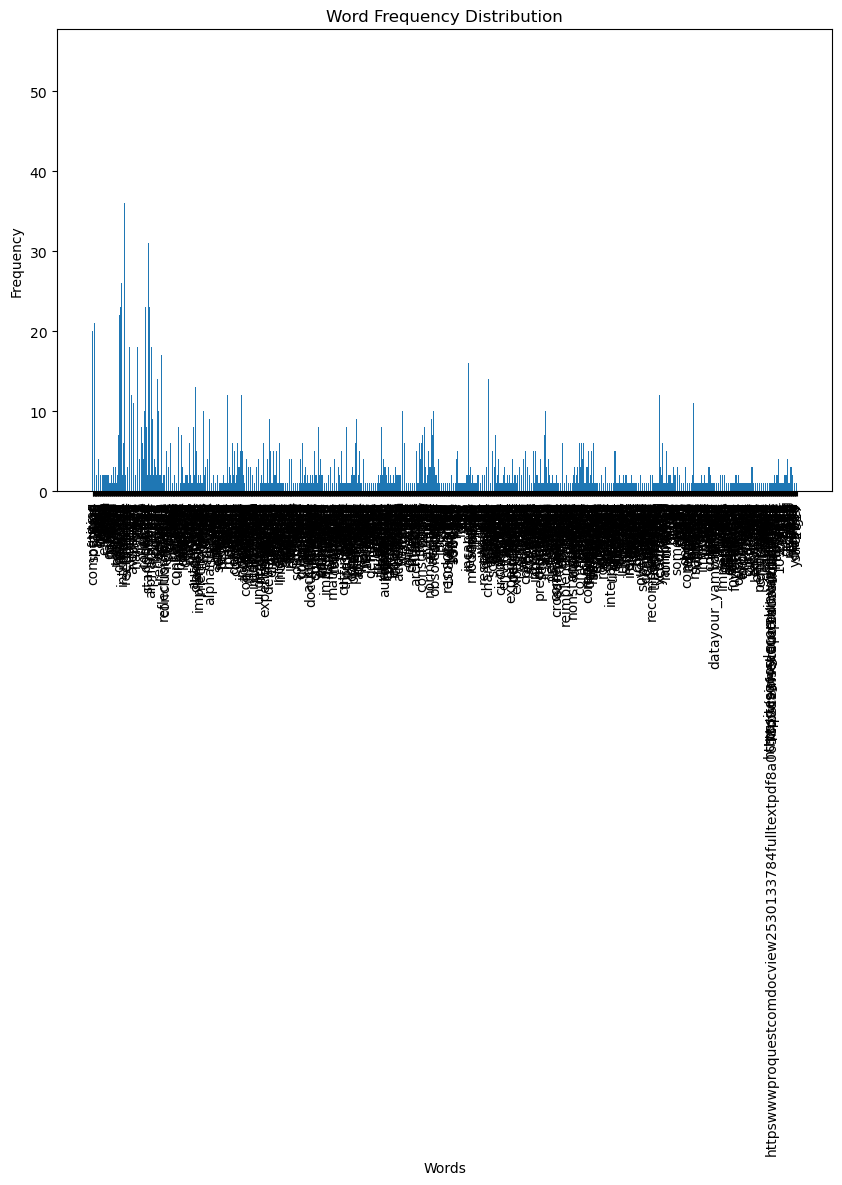

In [22]:
# Word frequency count
vocab = Counter(lemmatized_tokens)

# Plot word frequency distribution
plot_word_frequency(vocab)

In [23]:
def print_word_frequency(tokens):
    word_freq = Counter(tokens)
    for word, freq in word_freq.items():
        print(f'{word}: {freq}')

In [24]:
print_word_frequency(lemmatized_tokens)

suas: 20
competition: 19
software: 20
team: 21
fall: 5
2023: 4
final: 2
report: 3
author: 1
marc: 4
cruz: 4
abdul: 2
kalam: 2
syed: 2
max: 2
gross: 2
joshua: 2
estrada: 2
jason: 2
mar: 2
josh: 2
ng: 2
ethan: 2
tarrer: 2
sarkis: 2
gafayan: 1
rubayet: 1
mujahid: 1
david: 2
jackson: 2
status: 1
done: 1
date: 3
sep: 1
21: 3
relative: 3
link: 1
overview: 2
technical: 2
design: 7
document: 3
machine: 22
learning: 23
model: 55
1: 26
introduction: 2
2: 24
progress: 6
3: 36
timeline: 3
22: 2
recruitment: 12
august: 7
september: 3
4: 15
23: 4
phase: 18
october: 9
231: 2
odlc: 12
232: 2
obstacle: 15
avoidance: 11
5: 20
24: 5
25: 2
hardware: 5
trade: 17
study: 18
7: 7
251: 2
2511: 4
obc: 5
camera: 6
8: 8
252: 2
9: 6
26: 4
data: 24
collection: 10
dataset: 23
december: 3
10: 8
261: 2
standardized: 16
object: 31
shape: 23
ml: 9
262: 2
alphanumeric: 18
color: 23
12: 9
263: 2
13: 4
27: 4
modeling: 3
february: 4
271: 2
uav: 14
image: 55
recognition: 10
decision: 2
matrix: 4
2711: 2
training: 17
yolo: 16

In [25]:
def generate_wordcloud(text, title=None):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    if title:
        plt.title(title)
    plt.show()

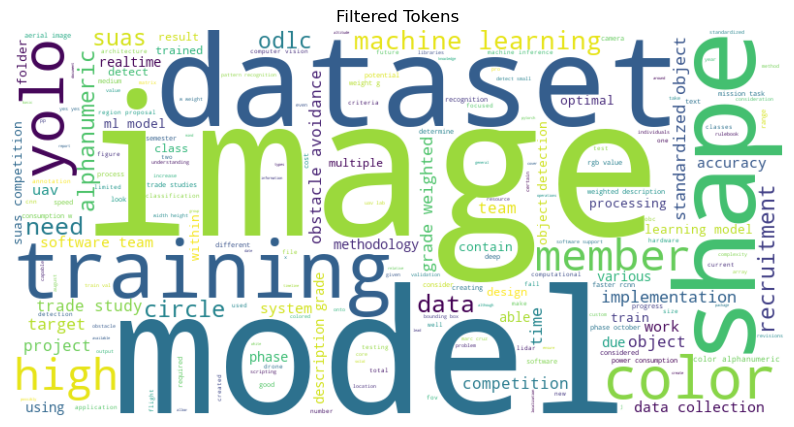

In [26]:
generate_wordcloud(' '.join(filtered_tokens), title="Filtered Tokens")

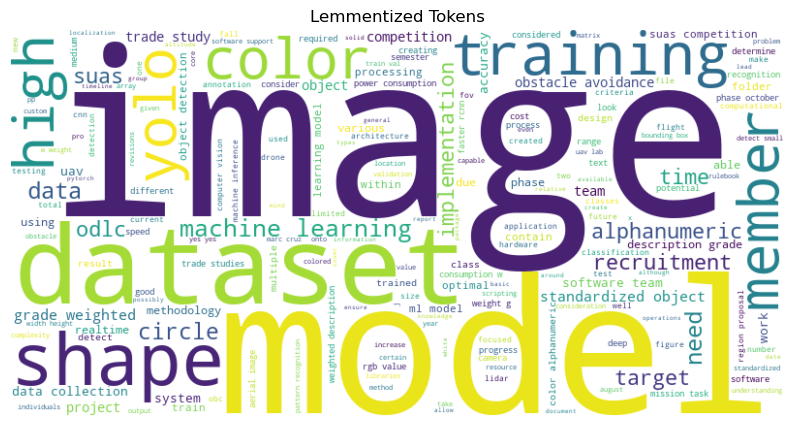

In [27]:
generate_wordcloud(' '.join(filtered_tokens), title="Lemmentized Tokens")

In [72]:
def word_associations(co_occurrence_matrix, vocab, target_word):
    # Find the index of the target word in the vocabulary
    target_idx = vocab[target_word]
    
    # Get the co-occurrence counts for the target word with other words
    associations = co_occurrence_matrix[target_idx]
    
    # Get the words associated with the target word
    associated_words = [word for word, idx in vocab.items() if idx != target_idx]
    
    return associations, associated_words
    
def co_occurrence_matrix(tokens):
    # Create a vocabulary mapping each word to an index
    vocab = {word: i for i, word in enumerate(set(tokens))}
    
    # Initialize co-occurrence matrix with zeros
    co_occurrence = np.zeros((len(vocab), len(vocab)))
    
    # Update co-occurrence matrix based on word pairs
    for i in range(len(tokens) - 1):
        idx_i = vocab[tokens[i]]
        for j in range(i + 1, len(tokens)):
            idx_j = vocab[tokens[j]]
            co_occurrence[idx_i][idx_j] += 1
            co_occurrence[idx_j][idx_i] += 1
            
    return co_occurrence, vocab
    
def plot_top_word_associations(associations, associated_words, target_word, top_n=10):
    # Sort associated words based on co-occurrence counts
    sorted_indices = np.argsort(associations)[::-1]  # Sort in descending order
    top_associated_words = [associated_words[i] for i in sorted_indices[:top_n]]
    top_associations = associations[sorted_indices[:top_n]]

    plt.figure(figsize=(10, 6))
    plt.barh(top_associated_words, top_associations)
    plt.xlabel('Co-occurrence Count')
    plt.ylabel('Associated Words')
    plt.title(f'Top {top_n} Words Associated with "{target_word}"')
    plt.show()

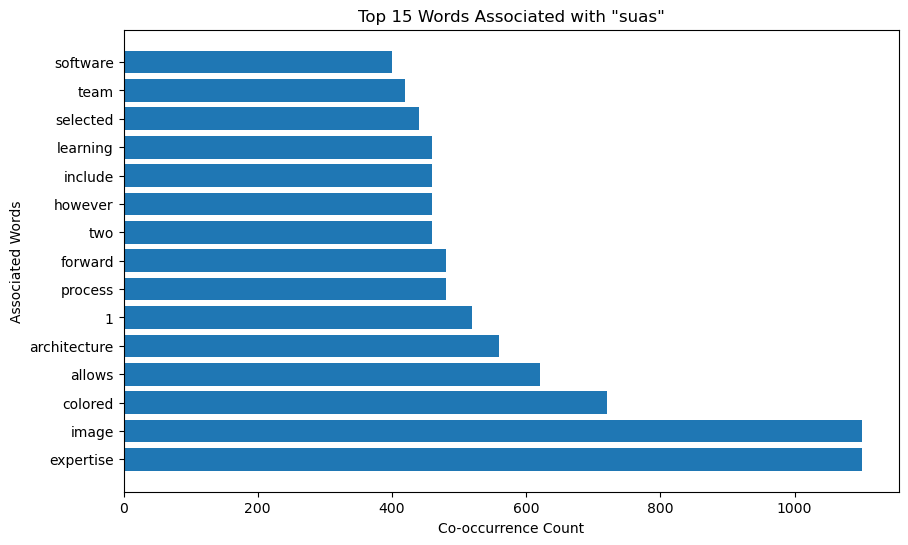

In [73]:
co_occurrence, vocab = co_occurrence_matrix(lemmatized_tokens)

target_word = "suas"
associations, associated_words = word_associations(co_occurrence, vocab, target_word)
associated_words = associated_words[:-1] # Remove any extra word in associated_words

plot_top_word_associations(associations, associated_words, target_word, top_n = 15)